# Preprocessing:

*Encode categorical data (e.g., 'Influencing Factor', 'Preferred Job') using one-hot encoding or MultiLabelBinarizer.



*Normalize numerical data (e.g., CGPA, skill ratings) using StandardScaler.


In [2]:
import pandas as pd
df = pd.read_csv("rrr_data.csv")

# Convert 'Prefer Job' and 'Influencing Factor' columns to string
df['Prefer Job'] = df['Prefer Job'].astype(str)
df['Influencing Factor'] = df['Influencing Factor'].astype(str)

# Splitting the multi-level categorical data into lists and strip extra spaces
df['Influencing Factor'] = df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Prefer Job'] = df['Prefer Job'].apply(lambda x: [cat.strip() for cat in x.split(',')])
#df

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Using MultiLabelBinarizer for 'Influencing Factor'
mlb = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb.fit_transform(df['Influencing Factor']), columns=mlb.classes_, index=df.index)



# Using MultiLabelBinarizer for 'Prefer Job'
prefer_job_encoded = pd.DataFrame(mlb.fit_transform(df['Prefer Job']), columns=mlb.classes_, index=df.index)


# Combining encoded features with the original dataframe
df_encoded = pd.concat([df.drop(['Influencing Factor', 'Prefer Job'], axis=1), influencing_factors_encoded, prefer_job_encoded], axis=1)

# Display the first 10 rows of the encoded DataFrame

columns_to_drop = ['Unnamed: 0']
df_encoded = df_encoded.drop(columns_to_drop, axis=1)
df_encoded.head(10)
#df_encoded.to_csv("preprocess_data.csv")


,cgpa,Critical Thinking,Problem Solving,Public Speaking,Professional Writing,Team Work,Leadership & Professional Attitude,Mass Communication,Software Engineering Principal,Data Structure & Algorithm,...,Govt Job,Hardware Sector,ML/AI Engineer,Management,Networking,Other,Researcher,Software Development,Teaching,UI/UX Designing
0,3.84,2,2,1,1,3,2,2,2,3,...,0,0,0,0,0,0,0,1,0,0
1,2.50,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
2,3.34,2,2,2,1,2,2,1,1,2,...,0,0,0,0,0,0,0,1,0,0
3,3.78,2,2,1,2,2,2,2,1,2,...,0,0,0,0,0,0,0,1,0,0
4,3.00,2,2,2,3,3,2,2,2,2,...,0,0,0,0,0,0,0,1,0,0
5,3.30,0,3,3,3,3,3,3,2,2,...,0,0,0,0,0,0,0,1,0,0
6,3.30,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
7,3.10,2,2,1,2,1,1,1,2,2,...,0,0,0,0,0,0,0,1,0,0
8,3.91,1,1,2,1,2,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
9,3.25,2,1,2,1,2,2,1,1,2,...,0,0,0,0,0,0,0,0,0,0


# Feature Engineering:
*Create new features by combining existing ones, such as average skill rating or the total number of projects/publications.



*Use Principal Component Analysis (PCA) to reduce the dimensionality of the data.

In [14]:
# Example: Calculate average skill rating
skills = ['cgpa', 'Critical Thinking', 'Problem Solving', 'Public Speaking', 'Professional Writing', 'Team Work',
          'Leadership & Professional Attitude', 'Mass Communication', 'Software Engineering Principal',
          'Data Structure & Algorithm', 'Database Management', 'Data Analysis skill', 'Web Developing Skill', 
          'Understanding of computer architecture & System', 'Understanding Operating System', 'Networking Concept', 
          'Cyber Security Skill', 'Machine Learning Skill', 'Robotics Skill', 'Research Skill', 'publication', 'project']

df_encoded['Average Skill Rating'] = df_encoded[skills].mean(axis=1)


# Example: Calculate total projects and publications
df_encoded['Total Projects/Publications'] = df_encoded['project'] + df_encoded['publication']



# Example: Count skills rated above a certain threshold
threshold = 2  # Example threshold for skill rating
df_encoded['Skill Diversity'] = (df_encoded[skills] > threshold).sum(axis=1)


# Example: Create a feature for Machine Learning and Data Analysis combination
df_encoded['ML_DA_Combination'] = (df_encoded['Machine Learning Skill'] > 0) & (df_encoded['Data Analysis skill'] > 0)



df_encoded

,cgpa,Critical Thinking,Problem Solving,Public Speaking,Professional Writing,Team Work,Leadership & Professional Attitude,Mass Communication,Software Engineering Principal,Data Structure & Algorithm,...,Networking,Other,Researcher,Software Development,Teaching,UI/UX Designing,Average Skill Rating,Total Projects/Publications,Skill Diversity,ML_DA_Combination
0,3.84,2,2,1,1,3,2,2,2,3,...,0,0,0,1,0,0,1.583636,3,3,True
1,2.50,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,1.022727,0,1,True
2,3.34,2,2,2,1,2,2,1,1,2,...,0,0,0,1,0,0,1.379091,2,1,True
3,3.78,2,2,1,2,2,2,2,1,2,...,0,0,0,1,0,0,1.580909,1,1,True
4,3.00,2,2,2,3,3,2,2,2,2,...,0,0,0,1,0,0,2.272727,5,9,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,3.62,2,1,1,2,1,1,1,0,0,...,0,0,0,0,0,0,0.619091,0,1,False
249,2.93,1,2,1,1,1,1,1,1,1,...,0,0,0,1,0,0,1.087727,1,1,True
250,3.26,2,2,1,2,2,2,1,2,2,...,0,0,0,1,1,0,1.739091,3,2,True
251,3.48,1,1,1,1,2,1,1,1,1,...,0,0,0,0,1,0,1.203636,2,1,True


# Principal Component Analysis (PCA)

Explained variance ratio: [0.18872381 0.08932748 0.05627715 0.05280363 0.04567584 0.03912638
 0.03228859 0.0301811  0.02937817 0.02562279]


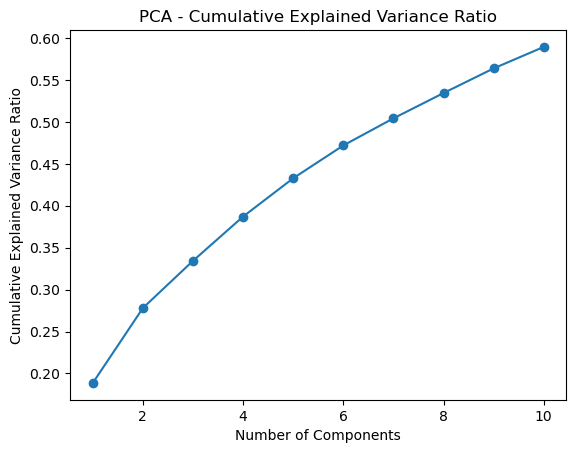

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt  

# Assuming df_encoded and other variables are defined as in your previous code

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)  # Assuming 'Student ID' is not a feature

# Initialize PCA with desired number of components
n_components = 10  # Example: Reduce to 10 principal components
pca = PCA(n_components=n_components)

# Fit PCA and transform data
pca_result = pca.fit_transform(scaled_data)

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Visualize cumulative explained variance ratio
plt.plot(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA - Cumulative Explained Variance Ratio')
plt.show()


# check every prefer job accuracy

In [3]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, hamming_loss, f1_score
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb


csv1 = pd.read_csv("rrr_data1.csv")


df = pd.DataFrame(csv1)


df['Prefer Job'] = df['Prefer Job'].astype(str)
df['Influencing Factor'] = df['Influencing Factor'].astype(str)


df['Influencing Factor'] = df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Prefer Job'] = df['Prefer Job'].apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']), columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']), columns=mlb_prefer_job.classes_, index=df.index)


columns_to_drop = ['Influencing Factor', 'Prefer Job']  
df = df.drop(columns_to_drop, axis=1)


df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)

# Splitting the data into features and labels
# prediction start
X = df.drop(prefer_job_encoded.columns, axis=1)
y = prefer_job_encoded


numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the features (excluding categorical columns)
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = OneVsRestClassifier(LogisticRegression(max_iter=10000, random_state=42))
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree
dt = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = MultiOutputClassifier(RandomForestClassifier(random_state=42))
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Gradient Boosting
gb = OneVsRestClassifier(GradientBoostingClassifier(random_state=42))
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# XGBoost Classifier
xgb_model = OneVsRestClassifier(xgb.XGBClassifier(random_state=42))
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Hard Voting Classifier
hard_voting = MultiOutputClassifier(VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=10000, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
], voting='hard'))
hard_voting.fit(X_train, y_train)
y_pred_hv = hard_voting.predict(X_test)

# Soft Voting Classifier
soft_voting = MultiOutputClassifier(VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=10000, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
], voting='soft'))
soft_voting.fit(X_train, y_train)
y_pred_sv = soft_voting.predict(X_test)

# Function to create a DataFrame with algorithms as rows and job categories as columns
def predictions_to_dataframe(y_preds, model_names, job_categories):
    predictions_dict = {}
    for y_pred, model_name in zip(y_preds, model_names):
        model_predictions = []
        for category in job_categories:
            prediction_percentage = (y_pred[:, mlb_prefer_job.classes_ == category].sum() / len(y_pred)) * 100
            model_predictions.append(f"{prediction_percentage:.2f}%")
        predictions_dict[model_name] = model_predictions
    predictions_df = pd.DataFrame(predictions_dict, index=job_categories)
    return predictions_df

# Get job categories from MultiLabelBinarizer
job_categories = mlb_prefer_job.classes_

# Collect predictions and model names
y_preds = [y_pred_dt, y_pred_rf, y_pred_xgb, y_pred_gb, y_pred_lr, y_pred_hv, y_pred_sv]
model_names = ["Decision Tree", "Random Forest", "XGBoost Classifier", "Gradient Boosting", 
               "Logistic Regression", "Hard Voting Classifier", "Soft Voting Classifier"]


predictions_df = predictions_to_dataframe(y_preds, model_names, job_categories)


predictions_df = predictions_df.T



#predictions_df.to_csv('predictions.csv')

predictions_df

,Abroad,BCS,Bank Job,Business,Cyber Security,Data Analysis,Database Administration,Gaming,Govt Job,Hardware Sector,ML/AI Engineer,Management,Networking,Other,Researcher,Software Development,Teaching,UI/UX Designing
Decision Tree,11.76%,13.73%,7.84%,7.84%,11.76%,5.88%,3.92%,5.88%,13.73%,0.00%,7.84%,1.96%,9.80%,9.80%,15.69%,74.51%,13.73%,0.00%
Random Forest,1.96%,1.96%,1.96%,0.00%,5.88%,3.92%,0.00%,1.96%,1.96%,0.00%,3.92%,0.00%,1.96%,0.00%,3.92%,82.35%,3.92%,0.00%
XGBoost Classifier,1.96%,1.96%,3.92%,0.00%,11.76%,5.88%,1.96%,1.96%,1.96%,0.00%,7.84%,0.00%,3.92%,0.00%,3.92%,84.31%,5.88%,0.00%
Gradient Boosting,5.88%,3.92%,5.88%,0.00%,11.76%,5.88%,1.96%,1.96%,3.92%,0.00%,5.88%,0.00%,5.88%,5.88%,3.92%,82.35%,1.96%,0.00%
Logistic Regression,9.80%,3.92%,1.96%,0.00%,5.88%,1.96%,0.00%,0.00%,5.88%,0.00%,3.92%,0.00%,3.92%,0.00%,1.96%,88.24%,0.00%,0.00%
Hard Voting Classifier,3.92%,1.96%,3.92%,0.00%,5.88%,3.92%,0.00%,1.96%,3.92%,0.00%,3.92%,0.00%,3.92%,0.00%,5.88%,80.39%,3.92%,0.00%
Soft Voting Classifier,7.84%,1.96%,5.88%,0.00%,9.80%,5.88%,0.00%,3.92%,7.84%,0.00%,3.92%,0.00%,3.92%,1.96%,5.88%,78.43%,7.84%,0.00%


# check Accuracy & Hamming Loss:

In [36]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, hamming_loss, f1_score
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb


csv1 = pd.read_csv("C:\\jupyter_work\\rrr_data.csv")


df = pd.DataFrame(csv1)


df['Prefer Job'] = df['Prefer Job'].astype(str)
df['Influencing Factor'] = df['Influencing Factor'].astype(str)


df['Influencing Factor'] = df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Prefer Job'] = df['Prefer Job'].apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']), columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']), columns=mlb_prefer_job.classes_, index=df.index)


columns_to_drop = ['Influencing Factor', 'Prefer Job']  
df = df.drop(columns_to_drop, axis=1)


df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)

# Splitting the data into features and labels
# predict
X = df.drop(prefer_job_encoded.columns, axis=1)
y = prefer_job_encoded

# Identify numerical columns for scaling
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the features (excluding categorical columns)
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = OneVsRestClassifier(LogisticRegression(max_iter=10000, random_state=42))
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree
dt = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = MultiOutputClassifier(RandomForestClassifier(random_state=42))
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Gradient Boosting
gb = OneVsRestClassifier(GradientBoostingClassifier(random_state=42))
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# XGBoost Classifier
xgb_model = OneVsRestClassifier(xgb.XGBClassifier(random_state=42))
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Hard Voting Classifier
hard_voting = MultiOutputClassifier(VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=10000, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
], voting='hard'))
hard_voting.fit(X_train, y_train)
y_pred_hv = hard_voting.predict(X_test)

# Soft Voting Classifier
soft_voting = MultiOutputClassifier(VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=10000, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
], voting='soft'))
soft_voting.fit(X_train, y_train)
y_pred_sv = soft_voting.predict(X_test)

# Evaluation function
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Hamming Loss:", hamming_loss(y_test, y_pred))
    print("F1 Score (micro):", f1_score(y_test, y_pred, average='micro'))
    print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
    print("\n")

# Evaluate each model
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")
evaluate_model(y_test, y_pred_xgb, "XGBoost Classifier")
evaluate_model(y_test, y_pred_hv, "Hard Voting Classifier")
evaluate_model(y_test, y_pred_sv, "Soft Voting Classifier")


Results for Logistic Regression:
Accuracy: 31.37%
Hamming Loss: 0.08387799564270153
F1 Score (micro): 0.5649717514124294
F1 Score (macro): 0.2307454364364933


Results for Decision Tree:
Accuracy: 27.45%
Hamming Loss: 0.09803921568627451
F1 Score (micro): 0.5945945945945946
F1 Score (macro): 0.39610509860509857


Results for Random Forest:
Accuracy: 41.18%
Hamming Loss: 0.07080610021786492
F1 Score (micro): 0.6198830409356725
F1 Score (macro): 0.347602608362102


Results for Gradient Boosting:
Accuracy: 50.98%
Hamming Loss: 0.06209150326797386
F1 Score (micro): 0.6951871657754012
F1 Score (macro): 0.46804467215859624


Results for XGBoost Classifier:
Accuracy: 39.22%
Hamming Loss: 0.07625272331154684
F1 Score (micro): 0.6153846153846154


C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\asfak\anacond

F1 Score (macro): 0.30514870931537597


Results for Hard Voting Classifier:
Accuracy: 39.22%
Hamming Loss: 0.07080610021786492
F1 Score (micro): 0.6285714285714286
F1 Score (macro): 0.3716148049481383


Results for Soft Voting Classifier:
Accuracy: 43.14%
Hamming Loss: 0.06753812636165578
F1 Score (micro): 0.6666666666666666
F1 Score (macro): 0.40418932918932915




C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


# XGBoost 

In [39]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb


csv1 = pd.read_csv("C://jupyter_work//rrr_data.csv")


df = pd.DataFrame(csv1)


columns_to_drop = ['Unnamed: 0']
df = df.drop(columns_to_drop, axis=1)

# Convert columns to string 
df['Prefer Job'] = df['Prefer Job'].astype(str)
df['Influencing Factor'] = df['Influencing Factor'].astype(str)

# Split 'Influencing Factor' and 'Prefer Job' into lists
df['Influencing Factor'] = df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Prefer Job'] = df['Prefer Job'].apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']),
                                           columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']),
                                  columns=mlb_prefer_job.classes_, index=df.index)

# Drop original 'Influencing Factor' and 'Prefer Job', and concatenate encoded columns
columns_to_drop = ['Influencing Factor', 'Prefer Job'] 
df = df.drop(columns_to_drop, axis=1)
df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)


# Split the data into features (X) and labels (y)
X = df.drop(prefer_job_encoded.columns, axis=1)  # Features
y = prefer_job_encoded  # Labels

# Identify numerical columns for scaling
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numerical columns using StandardScaler
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X.shape)
print(X_train.shape)
print(X_test.shape)

# XGBoost Classifier
xgb_model = OneVsRestClassifier(xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
xgb_model.fit(X_train, y_train)

# Define a function to predict job probabilities based on input data
def predict_job_probabilities(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # Process 'Influencing Factor' for encoding
    input_df['Influencing Factor'] = input_df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
    influencing_factors_encoded_input = pd.DataFrame(mlb_influencing.transform(input_df['Influencing Factor']),
                                                    columns=mlb_influencing.classes_)

    # Drop 'Influencing Factor' after encoding
    input_df = input_df.drop(['Influencing Factor'], axis=1)

    # Concatenate encoded features with input DataFrame
    input_df = pd.concat([input_df, influencing_factors_encoded_input], axis=1)

    # Standardize numerical columns in input data
    input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

    # Predict probabilities using the trained XGBoost model
    y_pred_prob = xgb_model.predict_proba(input_df)

    # Extracting only the 'Prefer Job' categories probabilities
    predicted_probabilities = {}
    for idx, job_category in enumerate(mlb_prefer_job.classes_):
        predicted_probabilities[job_category] = y_pred_prob[0][idx] * 100  # Convert probability to percentage

    return predicted_probabilities

# Example input data for prediction (excluding 'Machine Learning' skill)
input_data = {
    'cgpa': 3.7,
    'Critical Thinking': 0,
    'Problem Solving': 0,
    'Public Speaking': 2,
    'Professional Writing': 2,
    'Team Work': 0,
    'Leadership & Professional Attitude': 1,
    'Mass Communication': 2,
    'Software Engineering Principal': 3,
    'Data Structure & Algorithm': 2,
    'Database Management': 2,
    'Data Analysis skill': 2,
    'Web Developing Skill': 0,
    'Understanding of computer architecture & System': 0,
    'Understanding Operating System': 0,
    'Networking Concept': 1,
    'Cyber Security Skill': 1,
    'Machine Learning Skill': 1, 
    'Robotics Skill': 0,
    'Research Skill': 3,
    'publication': 5,
    'project': 3,
    'Influencing Factor': 'Salary, Job Environment'
}

# Predict job categories based on input data
predicted_probabilities = predict_job_probabilities(input_data)

# Sort predicted probabilities in descending order
sorted_probabilities = sorted(predicted_probabilities.items(), key=lambda x: x[1], reverse=True)

print("Predicted Prefer Job Categories with Probabilities (Descending Order):")
for job_category, percentage in sorted_probabilities:
    print(f"{job_category}: {percentage:.2f}%")


(253, 29)
(202, 29)
(51, 29)
Predicted Prefer Job Categories with Probabilities (Descending Order):
Abroad: 70.04%
Software Development: 61.35%
Database Administration: 17.13%
Data Analysis: 16.67%
ML/AI Engineer: 15.44%
Teaching: 13.76%
Cyber Security: 12.64%
Researcher: 1.22%
Hardware Sector: 0.90%
Business: 0.89%
Other: 0.80%
Networking: 0.49%
UI/UX Designing: 0.23%
Management: 0.20%
Govt Job: 0.16%
Bank Job: 0.13%
Gaming: 0.08%
BCS: 0.07%


# Support Vector Machines (SVM)

In [42]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

# Assuming you have already read and processed your data similar to previous examples
csv1 = pd.read_csv("C://jupyter_work//rrr_data.csv")
df = pd.DataFrame(csv1)
columns_to_drop = ['Unnamed: 0']
df = df.drop(columns_to_drop, axis=1)

# Convert columns to string
df['Prefer Job'] = df['Prefer Job'].astype(str)
df['Influencing Factor'] = df['Influencing Factor'].astype(str)

# Split 'Influencing Factor' and 'Prefer Job' into lists
df['Influencing Factor'] = df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Prefer Job'] = df['Prefer Job'].apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']),
                                           columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']),
                                  columns=mlb_prefer_job.classes_, index=df.index)

# Drop original 'Influencing Factor' and 'Prefer Job', and concatenate encoded columns
columns_to_drop = ['Influencing Factor', 'Prefer Job']
df = df.drop(columns_to_drop, axis=1)
df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)

# Split the data into features (X) and labels (y)
X = df.drop(prefer_job_encoded.columns, axis=1)  # Features
y = prefer_job_encoded  # Labels

# Identify numerical columns for scaling
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numerical columns using StandardScaler
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Machines (SVM)
svm_model = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))

# Train the SVM model
svm_model.fit(X_train, y_train)

# Define a function to predict job probabilities based on input data
def predict_job_probabilities(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # Process 'Influencing Factor' for encoding
    input_df['Influencing Factor'] = input_df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
    influencing_factors_encoded_input = pd.DataFrame(mlb_influencing.transform(input_df['Influencing Factor']),
                                                    columns=mlb_influencing.classes_)

    # Drop 'Influencing Factor' after encoding
    input_df = input_df.drop(['Influencing Factor'], axis=1)

    # Concatenate encoded features with input DataFrame
    input_df = pd.concat([input_df, influencing_factors_encoded_input], axis=1)

    # Standardize numerical columns in input data
    input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

    # Predict probabilities using the trained SVM model
    y_pred_prob = svm_model.predict_proba(input_df)

    # Extracting only the 'Prefer Job' categories probabilities
    predicted_probabilities = {}
    for idx, job_category in enumerate(mlb_prefer_job.classes_):
        predicted_probabilities[job_category] = y_pred_prob[0][idx] * 100  # Convert probability to percentage

    return predicted_probabilities

# Example input data for prediction (excluding 'Machine Learning' skill)
input_data = {
    'cgpa': 3.7,
    'Critical Thinking': 1,
    'Problem Solving': 1,
    'Public Speaking': 2,
    'Professional Writing': 2,
    'Team Work': 3,
    'Leadership & Professional Attitude': 1,
    'Mass Communication': 2,
    'Software Engineering Principal': 3,
    'Data Structure & Algorithm': 2,
    'Database Management': 3,
    'Data Analysis skill': 2,
    'Web Developing Skill': 2,
    'Understanding of computer architecture & System': 0,
    'Understanding Operating System': 0,
    'Networking Concept': 1,
    'Cyber Security Skill': 1,
    'Machine Learning Skill': 1,
    'Robotics Skill': 0,
    'Research Skill': 0,
    'publication': 0,
    'project': 3,
    'Influencing Factor': 'Salary, Job Environment'
}

# Predict job categories based on input data
predicted_probabilities = predict_job_probabilities(input_data)

# Sort predicted probabilities in descending order
sorted_probabilities = sorted(predicted_probabilities.items(), key=lambda x: x[1], reverse=True)

print("Predicted Prefer Job Categories with Probabilities (Descending Order):")
for job_category, percentage in sorted_probabilities:
    print(f"{job_category}: {percentage:.2f}%")


Predicted Prefer Job Categories with Probabilities (Descending Order):
Software Development: 92.62%
Abroad: 25.51%
Data Analysis: 24.17%
Teaching: 18.25%
ML/AI Engineer: 16.74%
Database Administration: 12.97%
Management: 8.07%
Business: 6.46%
Cyber Security: 6.14%
Govt Job: 6.01%
Other: 5.68%
Networking: 3.74%
Bank Job: 2.15%
Researcher: 0.48%
Hardware Sector: 0.28%
Gaming: 0.27%
UI/UX Designing: 0.20%
BCS: 0.14%


# RandomForestClassifier

In [43]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Read CSV file
csv1 = pd.read_csv("C://jupyter_work//rrr_data.csv")

# Create DataFrame
df = pd.DataFrame(csv1)

# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0']  # Adjust as needed
df = df.drop(columns_to_drop, axis=1)

# Convert columns to string if necessary (already done in your case)
df['Prefer Job'] = df['Prefer Job'].astype(str)
df['Influencing Factor'] = df['Influencing Factor'].astype(str)

# Split 'Influencing Factor' and 'Prefer Job' into lists
df['Influencing Factor'] = df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Prefer Job'] = df['Prefer Job'].apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']),
                                           columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']),
                                  columns=mlb_prefer_job.classes_, index=df.index)

# Drop original 'Influencing Factor' and 'Prefer Job', and concatenate encoded columns
columns_to_drop = ['Influencing Factor', 'Prefer Job']  # Drop original columns after encoding
df = df.drop(columns_to_drop, axis=1)
df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)

# Split the data into features (X) and labels (y)
X = df.drop(prefer_job_encoded.columns, axis=1)  # Features
y = prefer_job_encoded  # Labels

# Identify numerical columns for scaling
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numerical columns using StandardScaler
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest Classifier
rfc_model = OneVsRestClassifier(RandomForestClassifier(random_state=42))
rfc_model.fit(X_train, y_train)

# Define a function to predict job probabilities based on input data
def predict_job_probabilities(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # Process 'Influencing Factor' for encoding
    input_df['Influencing Factor'] = input_df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
    influencing_factors_encoded_input = pd.DataFrame(mlb_influencing.transform(input_df['Influencing Factor']),
                                                    columns=mlb_influencing.classes_, index=input_df.index)

    # Drop 'Influencing Factor' after encoding
    input_df = input_df.drop(['Influencing Factor'], axis=1)

    # Concatenate encoded features with input DataFrame
    input_df = pd.concat([input_df, influencing_factors_encoded_input], axis=1)

    # Standardize numerical columns in input data
    input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

    # Predict probabilities using the trained RandomForest model
    y_pred_prob = rfc_model.predict_proba(input_df)

    # Extracting only the 'Prefer Job' categories probabilities
    predicted_probabilities = {}
    for idx, job_category in enumerate(mlb_prefer_job.classes_):
        predicted_probabilities[job_category] = y_pred_prob[0][idx] * 100  # Convert probability to percentage

    return predicted_probabilities

# Example input data for prediction (excluding 'Machine Learning' skill)
input_data = {
    'cgpa': 3.7,
    'Critical Thinking': 1,
    'Problem Solving': 3,
    'Public Speaking': 2,
    'Professional Writing': 2,
    'Team Work': 3,
    'Leadership & Professional Attitude': 1,
    'Mass Communication': 2,
    'Software Engineering Principal': 3,
    'Data Structure & Algorithm': 2,
    'Database Management': 3,
    'Data Analysis skill': 2,
    'Web Developing Skill': 2,
    'Understanding of computer architecture & System': 0,
    'Understanding Operating System': 0,
    'Networking Concept': 1,
    'Cyber Security Skill': 1,
    'Machine Learning Skill': 1,  # Check spelling against X_train columns
    'Robotics Skill': 0,
    'Research Skill': 0,
    'publication': 0,
    'project': 3,
    'Influencing Factor': 'Salary, Job Environment'
}

# Predict job categories based on input data
predicted_probabilities = predict_job_probabilities(input_data)

# Sort predicted probabilities in descending order
sorted_probabilities = sorted(predicted_probabilities.items(), key=lambda x: x[1], reverse=True)

print("Predicted Prefer Job Categories with Probabilities (Descending Order):")
for job_category, percentage in sorted_probabilities:
    print(f"{job_category}: {percentage:.2f}%")


Predicted Prefer Job Categories with Probabilities (Descending Order):
Software Development: 79.00%
Cyber Security: 34.00%
ML/AI Engineer: 32.00%
Abroad: 27.00%
Database Administration: 24.00%
Data Analysis: 23.00%
Teaching: 23.00%
Management: 15.00%
Business: 9.00%
Networking: 6.00%
Bank Job: 5.00%
Gaming: 5.00%
Researcher: 4.00%
BCS: 3.00%
Govt Job: 3.00%
UI/UX Designing: 3.00%
Hardware Sector: 1.00%
Other: 1.00%


# Neural Networks

In [44]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier

# Read CSV file
csv1 = pd.read_csv("C://jupyter_work//rrr_data.csv")

# Create DataFrame
df = pd.DataFrame(csv1)

# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0']  # Adjust as needed
df = df.drop(columns_to_drop, axis=1)

# Convert columns to string if necessary (already done in your case)
df['Prefer Job'] = df['Prefer Job'].astype(str)
df['Influencing Factor'] = df['Influencing Factor'].astype(str)

# Split 'Influencing Factor' and 'Prefer Job' into lists
df['Influencing Factor'] = df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Prefer Job'] = df['Prefer Job'].apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']),
                                           columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']),
                                  columns=mlb_prefer_job.classes_, index=df.index)

# Drop original 'Influencing Factor' and 'Prefer Job', and concatenate encoded columns
columns_to_drop = ['Influencing Factor', 'Prefer Job']  # Drop original columns after encoding
df = df.drop(columns_to_drop, axis=1)
df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)

# Split the data into features (X) and labels (y)
X = df.drop(prefer_job_encoded.columns, axis=1)  # Features
y = prefer_job_encoded  # Labels

# Identify numerical columns for scaling
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numerical columns using StandardScaler
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MLP Classifier
mlp_model = OneVsRestClassifier(MLPClassifier(random_state=42, max_iter=1000))
mlp_model.fit(X_train, y_train)

# Define a function to predict job probabilities based on input data
def predict_job_probabilities(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # Process 'Influencing Factor' for encoding
    input_df['Influencing Factor'] = input_df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
    influencing_factors_encoded_input = pd.DataFrame(mlb_influencing.transform(input_df['Influencing Factor']),
                                                    columns=mlb_influencing.classes_, index=input_df.index)

    # Drop 'Influencing Factor' after encoding
    input_df = input_df.drop(['Influencing Factor'], axis=1)

    # Concatenate encoded features with input DataFrame
    input_df = pd.concat([input_df, influencing_factors_encoded_input], axis=1)

    # Standardize numerical columns in input data
    input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

    # Predict probabilities using the trained MLP model
    y_pred_prob = mlp_model.predict_proba(input_df)

    # Extracting only the 'Prefer Job' categories probabilities
    predicted_probabilities = {}
    for idx, job_category in enumerate(mlb_prefer_job.classes_):
        predicted_probabilities[job_category] = y_pred_prob[0][idx] * 100  # Convert probability to percentage

    return predicted_probabilities

# Example input data for prediction (excluding 'Machine Learning' skill)
input_data = {
    'cgpa': 3.7,
    'Critical Thinking': 1,
    'Problem Solving': 3,
    'Public Speaking': 2,
    'Professional Writing': 2,
    'Team Work': 3,
    'Leadership & Professional Attitude': 1,
    'Mass Communication': 2,
    'Software Engineering Principal': 3,
    'Data Structure & Algorithm': 2,
    'Database Management': 3,
    'Data Analysis skill': 2,
    'Web Developing Skill': 2,
    'Understanding of computer architecture & System': 0,
    'Understanding Operating System': 0,
    'Networking Concept': 1,
    'Cyber Security Skill': 1,
    'Machine Learning Skill': 1,  # Check spelling against X_train columns
    'Robotics Skill': 0,
    'Research Skill': 0,
    'publication': 0,
    'project': 3,
    'Influencing Factor': 'Salary, Job Environment'
}

# Predict job categories based on input data
predicted_probabilities = predict_job_probabilities(input_data)

# Sort predicted probabilities in descending order
sorted_probabilities = sorted(predicted_probabilities.items(), key=lambda x: x[1], reverse=True)

print("Predicted Prefer Job Categories with Probabilities (Descending Order):")
for job_category, percentage in sorted_probabilities:
    print(f"{job_category}: {percentage:.2f}%")


Predicted Prefer Job Categories with Probabilities (Descending Order):
Software Development: 99.50%
Database Administration: 13.02%
ML/AI Engineer: 11.65%
Data Analysis: 3.76%
Management: 1.86%
Abroad: 1.80%
Cyber Security: 0.65%
Other: 0.26%
Teaching: 0.17%
Networking: 0.11%
Hardware Sector: 0.08%
UI/UX Designing: 0.07%
Business: 0.07%
Gaming: 0.03%
Govt Job: 0.00%
Researcher: 0.00%
Bank Job: 0.00%
BCS: 0.00%


# LogisticRegression

In [47]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Read CSV file
csv1 = pd.read_csv("C://jupyter_work//rrr_data.csv")

# Create DataFrame
df = pd.DataFrame(csv1)

# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0']  # Adjust as needed
df = df.drop(columns_to_drop, axis=1)

# Convert columns to string if necessary (already done in your case)
df['Prefer Job'] = df['Prefer Job'].astype(str)
df['Influencing Factor'] = df['Influencing Factor'].astype(str)

# Split 'Influencing Factor' and 'Prefer Job' into lists
df['Influencing Factor'] = df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Prefer Job'] = df['Prefer Job'].apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']),
                                           columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']),
                                  columns=mlb_prefer_job.classes_, index=df.index)

print(prefer_job_encoded)

# Drop original 'Influencing Factor' and 'Prefer Job', and concatenate encoded columns
columns_to_drop = ['Influencing Factor', 'Prefer Job']  # Drop original columns after encoding
df = df.drop(columns_to_drop, axis=1)
df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)

# Split the data into features (X) and labels (y)
X = df.drop(prefer_job_encoded.columns, axis=1)  # Features
y = prefer_job_encoded  # Labels

# Identify numerical columns for scaling
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numerical columns using StandardScaler
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression with OneVsRestClassifier
lr_model = OneVsRestClassifier(LogisticRegression(max_iter=1000))  # Increase max_iter if necessary
lr_model.fit(X_train, y_train)

# Define a function to predict job probabilities based on input data
def predict_job_probabilities(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # Process 'Influencing Factor' for encoding
    input_df['Influencing Factor'] = input_df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
    influencing_factors_encoded_input = pd.DataFrame(mlb_influencing.transform(input_df['Influencing Factor']),
                                                    columns=mlb_influencing.classes_, index=input_df.index)

    # Drop 'Influencing Factor' after encoding
    input_df = input_df.drop(['Influencing Factor'], axis=1)

    # Concatenate encoded features with input DataFrame
    input_df = pd.concat([input_df, influencing_factors_encoded_input], axis=1)

    # Standardize numerical columns in input data
    input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

    # Predict probabilities using the trained Logistic Regression model
    y_pred_prob = lr_model.predict_proba(input_df)

    # Extracting only the 'Prefer Job' categories probabilities
    predicted_probabilities = {}
    for idx, job_category in enumerate(mlb_prefer_job.classes_):
        predicted_probabilities[job_category] = y_pred_prob[0][idx] * 100  # Convert probability to percentage

    return predicted_probabilities

# Example input data for prediction (excluding 'Machine Learning' skill)
input_data = {
    'cgpa': 3.7,
    'Critical Thinking': 1,
    'Problem Solving': 2,
    'Public Speaking': 2,
    'Professional Writing': 2,
    'Team Work': 3,
    'Leadership & Professional Attitude': 1,
    'Mass Communication': 2,
    'Software Engineering Principal': 2,
    'Data Structure & Algorithm': 2,
    'Database Management': 3,
    'Data Analysis skill': 2,
    'Web Developing Skill': 2,
    'Understanding of computer architecture & System': 0,
    'Understanding Operating System': 0,
    'Networking Concept': 1,
    'Cyber Security Skill': 1,
    'Machine Learning Skill': 1,  # Check spelling against X_train columns
    'Robotics Skill': 0,
    'Research Skill': 0,
    'publication': 0,
    'project': 3,
    'Influencing Factor': 'Salary, Job Environment'
}

# Predict job categories based on input data
predicted_probabilities = predict_job_probabilities(input_data)

# Sort predicted probabilities in descending order
sorted_probabilities = sorted(predicted_probabilities.items(), key=lambda x: x[1], reverse=True)

print("Predicted Prefer Job Categories with Probabilities (Descending Order):")
for job_category, percentage in sorted_probabilities:
    print(f"{job_category}: {percentage:.2f}%")


     Abroad  BCS  Bank Job  Business  Cyber Security  Data Analysis  \
0         0    0         0         0               0              0   
1         0    0         0         0               0              0   
2         0    0         0         0               0              0   
3         0    0         0         0               0              0   
4         0    0         0         0               0              0   
..      ...  ...       ...       ...             ...            ...   
248       0    0         0         0               1              0   
249       0    0         0         0               0              0   
250       0    0         0         0               0              0   
251       0    0         0         0               0              0   
252       0    0         0         0               0              1   

     Database Administration  Gaming  Govt Job  Hardware Sector  \
0                          0       0         0                0   
1            

# Model Evaluation:

*Evaluate the models using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.



*Use cross-validation to ensure the model's robustness.

In [49]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, hamming_loss
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb

# Load your CSV file
csv1 = pd.read_csv("C:\\jupyter_work\\rrr_data.csv")
df = pd.DataFrame(csv1)

# Convert 'Prefer Job' and 'Influencing Factor' columns to string and split into lists
df['Prefer Job'] = df['Prefer Job'].astype(str).apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Influencing Factor'] = df['Influencing Factor'].astype(str).apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']), columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']), columns=mlb_prefer_job.classes_, index=df.index)

# Drop original columns and combine encoded features with the dataframe
columns_to_drop = ['Influencing Factor', 'Prefer Job']
df = df.drop(columns_to_drop, axis=1)
df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)

# Splitting the data into features and labels
X = df.drop(prefer_job_encoded.columns, axis=1)
y = prefer_job_encoded

# Identify numerical columns for scaling
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the features (excluding categorical columns)
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': OneVsRestClassifier(LogisticRegression(max_iter=10000, random_state=42)),
    'Decision Tree': OneVsRestClassifier(DecisionTreeClassifier(random_state=42)),
    'Random Forest': MultiOutputClassifier(RandomForestClassifier(random_state=42)),
    'Gradient Boosting': OneVsRestClassifier(GradientBoostingClassifier(random_state=42)),
    'XGBoost Classifier': OneVsRestClassifier(xgb.XGBClassifier(random_state=42)),
    'Hard Voting Classifier': MultiOutputClassifier(VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=10000, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ], voting='hard')),
    'Soft Voting Classifier': MultiOutputClassifier(VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=10000, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ], voting='soft'))
}

# Define evaluation metrics
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc_ovr']

# Perform cross-validation and evaluate models
for name, model in models.items():
    print(f"Evaluating {name}...")
    cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)
    
    # Extract and print evaluation metrics
    accuracy = cv_results['test_accuracy'].mean()
    precision = cv_results['test_precision_macro'].mean()
    recall = cv_results['test_recall_macro'].mean()
    f1 = cv_results['test_f1_macro'].mean()
    roc_auc = cv_results['test_roc_auc_ovr'].mean()
    
    print(f"Cross-validation results for {name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    print("\n")


Evaluating Logistic Regression...


C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\model_selection\_validation

Cross-validation results for Logistic Regression:
Accuracy: 0.23
Precision: 0.37
Recall: 0.23
F1-score: 0.26
ROC-AUC: nan


Evaluating Decision Tree...


C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\model_selection\_validation

Cross-validation results for Decision Tree:
Accuracy: 0.25
Precision: 0.47
Recall: 0.56
F1-score: 0.49
ROC-AUC: nan


Evaluating Random Forest...


C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\model_selection\_validation

Cross-validation results for Random Forest:
Accuracy: 0.46
Precision: 0.61
Recall: 0.36
F1-score: 0.43
ROC-AUC: nan


Evaluating Gradient Boosting...


C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\model_selection\_validation

Cross-validation results for Gradient Boosting:
Accuracy: 0.43
Precision: 0.59
Recall: 0.48
F1-score: 0.50
ROC-AUC: nan


Evaluating XGBoost Classifier...


C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\model_selection\_validation

Cross-validation results for XGBoost Classifier:
Accuracy: 0.40
Precision: 0.55
Recall: 0.39
F1-score: 0.43
ROC-AUC: nan


Evaluating Hard Voting Classifier...


C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\model_selection\_validation

C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    y_pred = method_caller(clf, "predict_proba", X, pos_label=self._get_pos_label())
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\asfak\anaconda

Cross-validation results for Hard Voting Classifier:
Accuracy: 0.39
Precision: 0.58
Recall: 0.37
F1-score: 0.43
ROC-AUC: nan


Evaluating Soft Voting Classifier...


C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\model_selection\_validation

Cross-validation results for Soft Voting Classifier:
Accuracy: 0.42
Precision: 0.59
Recall: 0.47
F1-score: 0.51
ROC-AUC: nan




C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 401, in _score
    return self._sign * self._score_func(y, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py", line 605, in roc_auc_score
    y_score = check_array(y_score, ensure_2d=False)
              ^^^^^^^^^^^^^^

In [50]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, hamming_loss
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb

# Load your CSV file
df = pd.read_csv("C:\\jupyter_work\\rrr_data.csv")

# Convert 'Prefer Job' and 'Influencing Factor' columns to string and split into lists
df['Prefer Job'] = df['Prefer Job'].astype(str).apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Influencing Factor'] = df['Influencing Factor'].astype(str).apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']), columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']), columns=mlb_prefer_job.classes_, index=df.index)

# Drop original columns and combine encoded features with the dataframe
columns_to_drop = ['Influencing Factor', 'Prefer Job']
df = df.drop(columns_to_drop, axis=1)
df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)

# Splitting the data into features and labels
X = df.drop(prefer_job_encoded.columns, axis=1)
y = prefer_job_encoded

# Identify numerical columns for scaling
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the features (excluding categorical columns)
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': OneVsRestClassifier(LogisticRegression(max_iter=10000, random_state=42)),
    'Decision Tree': OneVsRestClassifier(DecisionTreeClassifier(random_state=42)),
    'Random Forest': MultiOutputClassifier(RandomForestClassifier(random_state=42)),
    'Gradient Boosting': OneVsRestClassifier(GradientBoostingClassifier(random_state=42)),
    'XGBoost Classifier': OneVsRestClassifier(xgb.XGBClassifier(random_state=42)),
    'Hard Voting Classifier': MultiOutputClassifier(VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=10000, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ], voting='hard')),
    'Soft Voting Classifier': MultiOutputClassifier(VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=10000, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ], voting='soft'))
}

# Define evaluation metrics
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc_ovr']

# Perform cross-validation and evaluate models
for name, model in models.items():
    print(f"Evaluating {name}...")
    cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)
    
    # Extract and print evaluation metrics
    accuracy = cv_results['test_accuracy'].mean()
    precision = cv_results['test_precision_macro'].mean()
    recall = cv_results['test_recall_macro'].mean()
    f1 = cv_results['test_f1_macro'].mean()
    roc_auc = cv_results['test_roc_auc_ovr'].mean()
    
    print(f"Cross-validation results for {name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    print("\n")


Evaluating Logistic Regression...


C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\model_selection\_validation

Cross-validation results for Logistic Regression:
Accuracy: 0.23
Precision: 0.37
Recall: 0.23
F1-score: 0.26
ROC-AUC: nan


Evaluating Decision Tree...


C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\model_selection\_validation

Cross-validation results for Decision Tree:
Accuracy: 0.25
Precision: 0.47
Recall: 0.56
F1-score: 0.49
ROC-AUC: nan


Evaluating Random Forest...


C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\model_selection\_validation

Cross-validation results for Random Forest:
Accuracy: 0.46
Precision: 0.61
Recall: 0.36
F1-score: 0.43
ROC-AUC: nan


Evaluating Gradient Boosting...


C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\model_selection\_validation

Cross-validation results for Gradient Boosting:
Accuracy: 0.43
Precision: 0.59
Recall: 0.48
F1-score: 0.50
ROC-AUC: nan


Evaluating XGBoost Classifier...


C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\model_selection\_validation

Cross-validation results for XGBoost Classifier:
Accuracy: 0.40
Precision: 0.55
Recall: 0.39
F1-score: 0.43
ROC-AUC: nan


Evaluating Hard Voting Classifier...


C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\model_selection\_validation

C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    y_pred = method_caller(clf, "predict_proba", X, pos_label=self._get_pos_label())
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\asfak\anaconda

Cross-validation results for Hard Voting Classifier:
Accuracy: 0.39
Precision: 0.58
Recall: 0.37
F1-score: 0.43
ROC-AUC: nan


Evaluating Soft Voting Classifier...


C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\model_selection\_validation

Cross-validation results for Soft Voting Classifier:
Accuracy: 0.42
Precision: 0.59
Recall: 0.47
F1-score: 0.51
ROC-AUC: nan




C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 401, in _score
    return self._sign * self._score_func(y, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py", line 605, in roc_auc_score
    y_score = check_array(y_score, ensure_2d=False)
              ^^^^^^^^^^^^^^